# Project NLP
Nama    : Roby Purba Sakty

project ini merupakan salah satu syarat unutk bisa mengakses model selanjutnya
suber dataset
https://www.kaggle.com/datasets/lokkagle/movie-genre-data

In [1]:
import pandas as pd
df  = pd.read_csv('kaggle_movie_train.csv')
# df.head()

df.isnull().values.any()

False

In [2]:
# menghapus id karena data tersebu tidak akan digunakan
df = df.drop(columns='id')
df


,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


In [3]:
# membuat one-hot-endcoding
kategory = pd.get_dummies(df.genre)
df_baru = pd.concat([df, kategory], axis=1)
df_baru


,text,genre,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller,0,0,0,0,0,0,0,0,1
1,"t, summa cum laude and all. And I'm about to l...",comedy,0,0,1,0,0,0,0,0,0
2,"up Come, I have a surprise.... She takes him ...",drama,0,0,0,1,0,0,0,0,0
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller,0,0,0,0,0,0,0,0,1
4,"nd dismounts, just as the other children reach...",drama,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,drama,0,0,0,1,0,0,0,0,0
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama,0,0,0,1,0,0,0,0,0
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller,0,0,0,0,0,0,0,0,1
22577,....with marked skill and dexterity . LANA wry...,action,1,0,0,0,0,0,0,0,0


In [4]:
# menghapus genre karena tidak dibutuhkan lagi
df_baru = df_baru.drop(columns='genre')
df_baru

,text,action,adventure,comedy,drama,horror,other,romance,sci-fi,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,0,0,0,0,0,1
1,"t, summa cum laude and all. And I'm about to l...",0,0,1,0,0,0,0,0,0
2,"up Come, I have a surprise.... She takes him ...",0,0,0,1,0,0,0,0,0
3,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,0,0,0,0,0,1
4,"nd dismounts, just as the other children reach...",0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,0,0,0,1,0,0,0,0,0
22575,shards. BOJO LAZ! Laz pushes Deke back through...,0,0,0,1,0,0,0,0,0
22576,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,0,0,0,0,0,1
22577,....with marked skill and dexterity . LANA wry...,1,0,0,0,0,0,0,0,0


In [5]:
# memisahkan atribut dan label
text = df_baru['text'].values
label = df_baru[['action', 'adventure','comedy', 'drama', 'horror', 'other', 'romance', 'sci-fi', 'thriller']].values

In [6]:
from sklearn.model_selection import train_test_split

text_latih, text_test, label_latih, label_test = train_test_split(text, label, test_size=0.2)

In [7]:
# proses tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# setting tokenisasi
tokenizer = Tokenizer(num_words=8000, oov_token='x')
# melakukan tokenisasi
tokenizer.fit_on_texts(text_latih)
tokenizer.fit_on_texts(text_test)
# mengubah kedalam sequences
sukeses_latih = tokenizer.texts_to_sequences(text_latih)
sukeses_test = tokenizer.texts_to_sequences(text_test)
# membuat data menjadi sama atau normalisasi
padded_latih = pad_sequences(sukeses_latih)
padded_test = pad_sequences(sukeses_test)



In [8]:
# membuat model 
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=8000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [9]:
from tensorflow.keras.optimizers import Adam
Adam(learning_rate=0.00146, name='Adam')
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('accuracy')>0.9) and (logs.get('val_accuracy')>0.9)):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [11]:
num_epochs = 15
history = model.fit(
    padded_latih, label_latih,
    epochs=num_epochs, 
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[callbacks])

Epoch 1/15
565/565 - 103s - loss: 1.5698 - accuracy: 0.3737 - val_loss: 1.4002 - val_accuracy: 0.3984 - 103s/epoch - 182ms/step
Epoch 2/15


KeyboardInterrupt: 

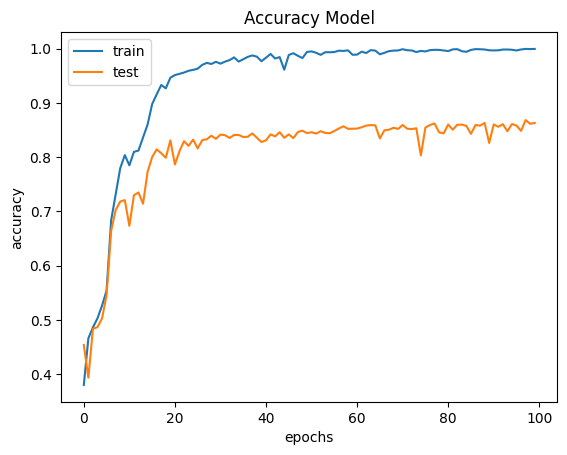

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


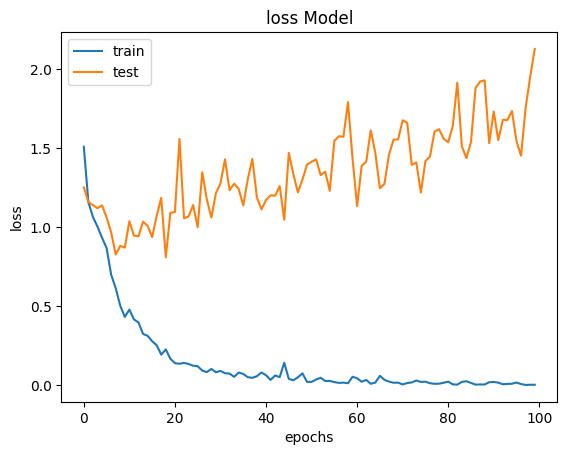

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss Model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# membuat model 
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=8000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
Adam(learning_rate=0.0005, name='Adam')
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy', bach_sieze=15000, metrics = ['accuracy'])

In [ ]:
num_epochs = 15
history = model.fit(
    padded_latih, label_latih,
    epochs=num_epochs, 
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[callbacks])

***Bila belum bintang 5 mohon tolak dan berikan masukan***

terima kasih